#NMTFD 2: Practical 1
Arjun Lenan Sandhya, Salman Salim

Importing the neccesary libraries

In [ ]:
%matplotlib inline
import sys
import numpy as np
import scipy.linalg as scla
import matplotlib.pyplot as plt
import math as mt
import matplotlib.pylab as pylab
import os
from chebdif import chebdif
import pandas as pd


Shell script for generating the data for velocity and budget terms

In [ ]:
# execute the script that in turn runs pxyst
# out = os.system("./read_stat.sh xy.stat stat_vel.in  stat_vel.data");
# out = os.system("./read_stat.sh xy.stat stat_bud.in  stat_bud.data");

Loading the data from stat_vel.data

In [ ]:
stat = np.loadtxt('stat_vel.data')
re=4200
y=stat[:,0]
ny=stat.shape[0]
y_,D_=chebdif(ny,1)
D=D_[0,:,:]

Computing the lstar and retau

In [ ]:
dudy = D@stat[:,1]
utau = np.sqrt((dudy[-1]-dudy[0])/2/re);
lstar = 1/utau/re;
retau = 1/lstar
print('Re=%.5f Retau=%.5f' % (re,retau) )

Re=4200.00000 Retau=189.13270


Plot of U+ against y+

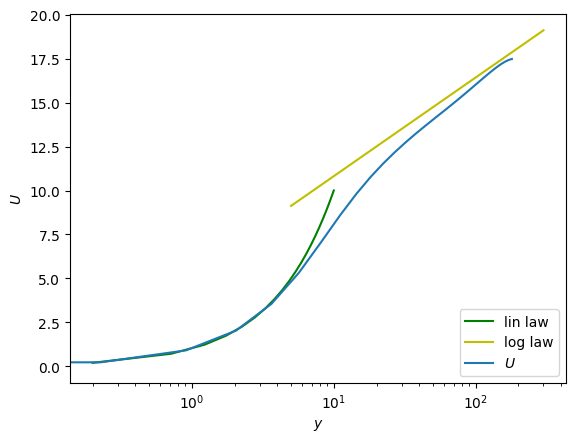

In [ ]:
u = stat[:,1]
# compute uplus (including average over the two channel sides) and yplus
yp = (y[0:int(ny/2)]+1)/lstar
up = (u[0:int(ny/2)] + u[ny-1:int(ny/2):-1])/2/utau

fig=plt.figure()
# lin law
ypp=np.linspace(0.2,10,20);
plt.plot(ypp,ypp,'g',label='lin law')

# log law
ypp = np.linspace(5,300,20);
plt.plot(ypp,1/0.41*np.log(ypp)+5.2,'y',label='log law')

plt.semilogx(yp,up,label='$U$')
plt.xlabel(r'$y$')
plt.ylabel(r'$U$')

plt.legend(loc='lower right')

plt.show()

Plot normalised Reynolds stress in outer scale

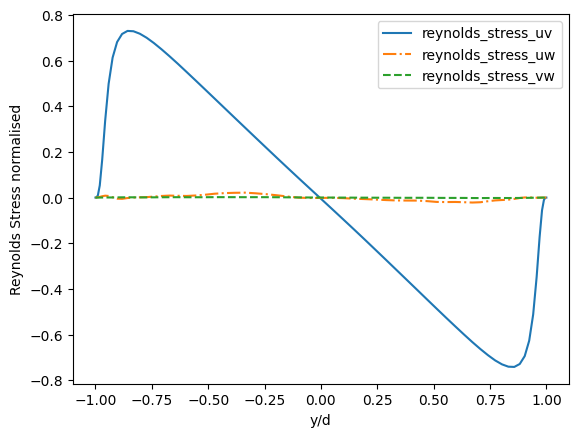

In [ ]:
labels=['reynolds_stress_uv','reynolds_stress_uw','reynolds_stress_vw']
lines=['-','-.','--']

#Reynolds stress is normalised by utau^2
#note that we are taking minus of stress terms
for i in range(3):
    plt.plot(stat[:,0],-stat[:,7+i]/(utau*utau),label=f'{labels[i]}',linestyle=lines[i])
plt.xlabel('y/d')
plt.ylabel('Reynolds Stress normalised')
plt.legend()
plt.show()

Plot of normalised Reynolds stress in inner scale

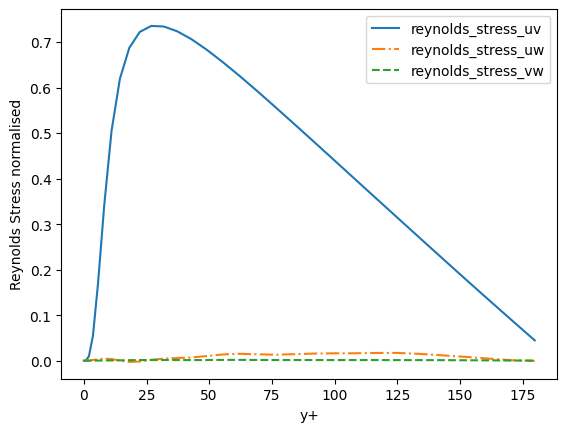

In [ ]:
labels=['reynolds_stress_uv','reynolds_stress_uw','reynolds_stress_vw']
lines=['-','-.','--']
#variable to store the normalised reynolds stress values
stress=np.zeros((32,3))

#Taking the average of stress across the symmetric points in channel, for bottom part of channel we have taken negative of stress
#Reynolds stress is normalised by utau^2
#note that we are taking minus of stress terms
for i in range(3):
    stress[:,i]=-(((stat[:,7+i][0:int(ny/2)])+(-stat[:,7+i][ny-1:int(ny/2):-1]))/2)/(utau*utau)

for i in range(3):
  plt.plot(yp,stress[:,i],label=f'{labels[i]}',linestyle=lines[i])
plt.xlabel('y+')
plt.ylabel('Reynolds Stress normalised')
plt.legend()
plt.show()

Plot of normalised velocity rms in Outer scale

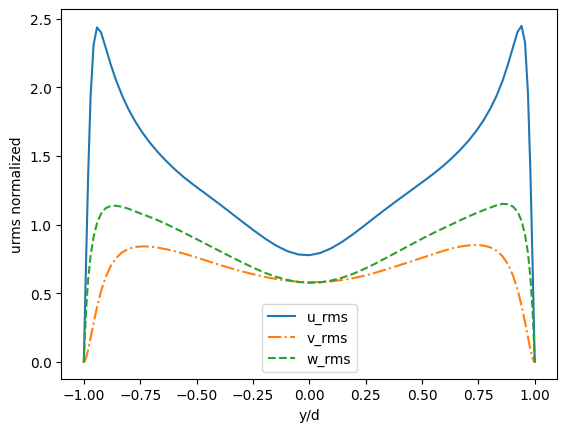

In [ ]:
labels=['u_rms','v_rms','w_rms']
lines=['-','-.','--']

#velocity rms normalised by utau
for i in range(3):
    plt.plot(stat[:,0],stat[:,4+i]/utau,label=f'{labels[i]}',linestyle=lines[i])
plt.ylabel('urms normalized')
plt.xlabel('y/d')
plt.legend()
plt.show()


Plot of normalised velocity rms in inner scale

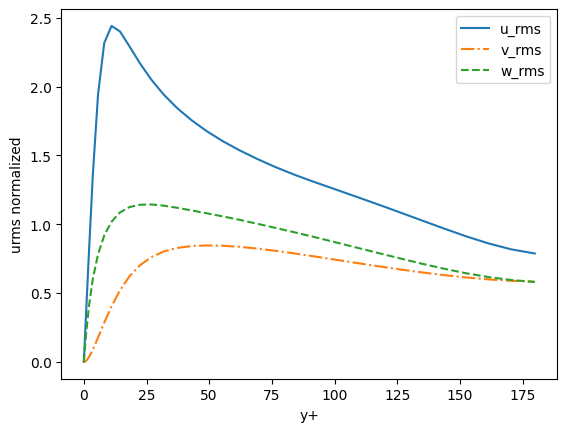

In [ ]:
#variable to store the normalised inner scaled velocity rms
vel_rms=np.zeros((32,3))
labels=['u_rms','v_rms','w_rms']
lines=['-','-.','--']

#Taking the average of velocity rms across the symmetric points in channel and normalised by utau
for i in range(3):
    vel_rms[:,i]=(stat[:,4+i][0:int(ny/2)]+stat[:,4+i][ny-1:int(ny/2):-1])/2/utau

for i in range(3):
  plt.plot(yp,vel_rms[:,i],label=f'{labels[i]}',linestyle=lines[i])
plt.ylabel('urms normalized')
plt.xlabel('y+')
plt.legend()
plt.show()

Plot of inner scale budget terms in transport equation

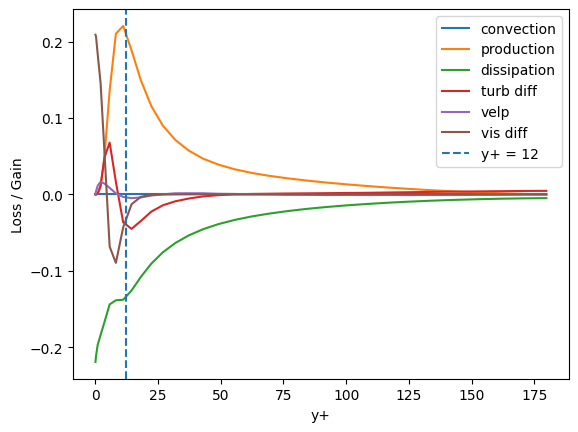

In [ ]:
#loading the data from stat_bud.data
energy = np.loadtxt('stat_bud.data')

#variable to store budget terms
avg_energy = np.ones((32, 7))

#1st Column contains the y+ values
avg_energy[:,0]=yp

#Taking the average of stress across the symmetric points in channel
#normalised by (lstar/(utau**3)) which is obtain from dimensional analysis of terms
for i in range(1,7):
    avg_energy[:,i]=(lstar/(utau**3))*(energy[:,i][0:int(ny/2)]+energy[:,i][ny-1:int(ny/2):-1])/2

labels=['convection','production','dissipation','turb diff','velp','vis diff']

for i in range(1,7):
  plt.plot(yp,avg_energy[:,i],label=f'{labels[i-1]}',linestyle='-')
plt.xlabel("y+")
plt.ylabel("Loss / Gain")
plt.axvline(12,linestyle='--',label='y+ = 12')
plt.legend()
plt.show()